In [232]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Read File

In [234]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv').set_index('PassengerId')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv').set_index('PassengerId')
gender_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv').set_index('PassengerId')

In [235]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [236]:
gender_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [237]:
merge_test=pd.concat([test_df, gender_df], axis=1)

In [238]:
merge_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [239]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
train_df.shape

(891, 11)

In [241]:
merge_test.shape

(418, 11)

In [242]:
merge_df=pd.concat([train_df, merge_test])

In [243]:
merge_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# Exploring Data

In [244]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [245]:
merge_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
merge_df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [247]:
merge_df.isnull().sum()/train_df.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.295174
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.001122
Cabin       1.138047
Embarked    0.002245
dtype: float64

In [248]:
merge_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

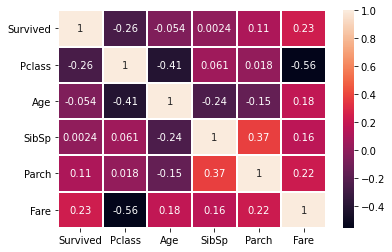

In [249]:
sns.heatmap(merge_df.corr(), annot=True, linewidths=1)
plt.show()

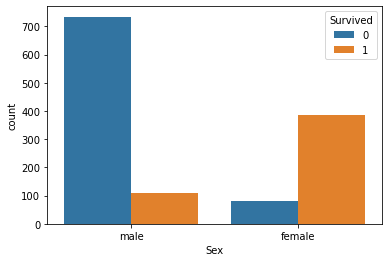

In [250]:
sns.countplot(x='Sex', hue='Survived', data=merge_df)
plt.show()

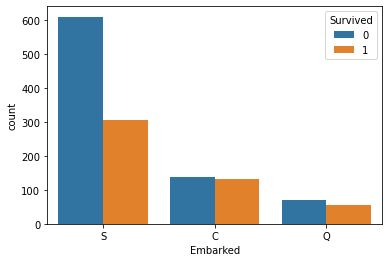

In [251]:
sns.countplot(x='Embarked', hue='Survived', data=merge_df)
plt.show()

In [252]:
pd.pivot_table(merge_df , index = 'Survived',values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.510986,23.879124,0.311656,0.496933
1,28.931079,48.811497,0.506073,0.502024


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


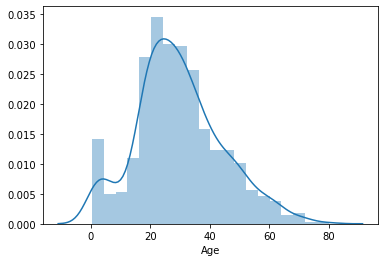

In [253]:
sns.distplot(train_df[(merge_df['Age']>0)]['Age'])

In [254]:
merge_df['Fare'] = merge_df['Fare'].fillna(train_df['Fare'].mean())
merge_df['Sex'] = merge_df['Sex'].replace(['male', 'female'], [0,1])
merge_df['Age'] = merge_df['Age'].fillna(train_df['Age'].mean())
merge_df['Embarked'] = merge_df['Embarked'].replace(['S', 'C','Q'], [0,1,2])

In [255]:
merge_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [256]:
merge_df = merge_df.drop(['Name', 'Ticket','Cabin'], axis = 1)

In [257]:
merge_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0.0
2,1,1,1,38.0,1,0,71.2833,1.0
3,1,3,1,26.0,0,0,7.9250,0.0
4,1,1,1,35.0,1,0,53.1000,0.0
5,0,3,0,35.0,0,0,8.0500,0.0


In [258]:
for i in ['Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    merge_df[i] = merge_df[i].fillna(0)

In [259]:
merge_df.isnull().sum()/merge_df.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [260]:
merge_df.shape

(1309, 8)

In [261]:
X = merge_df.copy().drop('Survived', axis=1)
Y = merge_df[['Survived']]

In [262]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.000000,1,0,7.2500,0.0
2,1,1,38.000000,1,0,71.2833,1.0
3,3,1,26.000000,0,0,7.9250,0.0
4,1,1,35.000000,1,0,53.1000,0.0
5,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
1305,3,0,29.699118,0,0,8.0500,0.0
1306,1,1,39.000000,0,0,108.9000,1.0
1307,3,0,38.500000,0,0,7.2500,0.0


In [263]:
Y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
1305,0
1306,1
1307,0


# Creating Models

In [264]:
d3_model = DecisionTreeClassifier()
nb_model = GaussianNB()
mlp_model = MLPClassifier()

In [265]:
#set k folds when k = 5
cv = 5

In [266]:
#Creating model and spliting k folds at the same time
res_d3 = cross_val_predict(d3_model, X, Y, cv=cv)
print(metrics.classification_report(Y, res_d3, digits=2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       815
           1       0.75      0.71      0.73       494

    accuracy                           0.80      1309
   macro avg       0.79      0.79      0.79      1309
weighted avg       0.80      0.80      0.80      1309



In [267]:
res_nb = cross_val_predict(nb_model, X, Y, cv=cv)
print(metrics.classification_report(Y, res_nb, digits=2))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       815
           1       0.79      0.78      0.79       494

    accuracy                           0.84      1309
   macro avg       0.83      0.83      0.83      1309
weighted avg       0.84      0.84      0.84      1309



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [268]:
res_nn = cross_val_predict(mlp_model, X, Y, cv=cv)
print(metrics.classification_report(Y, res_nn, digits=2))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/c

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       815
           1       0.83      0.77      0.79       494

    accuracy                           0.85      1309
   macro avg       0.85      0.83      0.84      1309
weighted avg       0.85      0.85      0.85      1309

